In [1]:
import torch

In [2]:
z = torch.zeros(5, 3) # 5 rows, 3 cols
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [3]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [4]:
# common to manually seed RNG, so that results can be reproduced in same order
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # re-seeding repeats same values

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [5]:
# arithmetic is intuitive, like matrix operations
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2     # every element is multiplied by scalar 2
print('\n', twos)

threes = ones + twos          # addition is allowed bc shapes are similar
print('\n', threes)           # tensors are added element-wise
print('\n', threes.shape)     # this has the same dimensions as input tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

 tensor([[2., 2., 2.],
        [2., 2., 2.]])

 tensor([[3., 3., 3.],
        [3., 3., 3.]])

 torch.Size([2, 3])


In [6]:
r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
r3 = r1 + r2
# this fails bc shapes don't match

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [ ]:
r = torch.rand(2, 2) - 0.5 * 2   # set values between -1 and 1
print('A random matrix, r:')
print(r)

# Common math operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# So are trigonometric functions:
print('\nInverse of sine of r:')
print(torch.asin(r))

# And linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# And statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

*****

BUILDING SIMPLE MODELS

In [7]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [8]:
# Will be using LeNet Neural Network, which classifies handwritten digits 0-9

In [9]:
class LeNet(nn.Module):
    
    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 3x3 square convulution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify  a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension (first one)
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [10]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [11]:
# stand in dummy variable for 32x32 black/white image
input = torch.rand(1, 1, 32, 32)
print('Image batch shape:')
print(input.shape)

Image batch shape:
torch.Size([1, 1, 32, 32])


In [12]:
output = net(input)    # do not run foward() directly, but call the instance of the neural net object
print('Raw output:')
print(output)
print(output.shape)
# this outputs the confidence the machine associates the input is with each of the 10 possible digits (0-9)
# and the batch size is 1

Raw output:
tensor([[-0.0926,  0.0878,  0.0033, -0.0239,  0.0661, -0.0982, -0.0824, -0.0701,
         -0.0400, -0.0096]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


****

Datasets and DataLoader

In [13]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

In [14]:
# first, transform incoming images into PyTorch Tensors:
transform = transforms.Compose(
    [transforms.ToTensor(), # takes images loaded by Pillow library and converts to pytorch tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # adjusts values of tensor so average is 0 and std_dev is 0.5
    ]
)
# most activation functions have their strongest gradients around x = 0, so centering data there can speed learning

In [15]:
# Next, create instance of CIFAR10 dataset
# This is a set of 32x32 color images representing 10 classes of objects (6 of diff animals, 4 of diff vehicles)
# bird, cat, deer, dog, frog, horse
# airplane, automobile, ship, truck

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)

Files already downloaded and verified


In [16]:
# When instatiating a dataset, must specify:
# 1. Filesystem path where we want data to go
# 2. Whether this data is being used for training or testing
# 3. Whether we would like to download this dataset if we haven't already
# 4. The transformations to apply to this data

In [17]:
# Once data is ready, can give it to the DataLoader

In [18]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)

In [19]:
# DataLoader organizes input tensors served by the dataset into batches with parameters specified
# Here, we
# 1. Specify the dataset (trainset)
# 2. Set the batch size to give batches of 4 images from the trainset
# 3. Randomize their order shuffle=True
# 4. Spin up two workers to load data from disk

In [20]:
# BUG FIX for the following code
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

  cat plane truck  ship


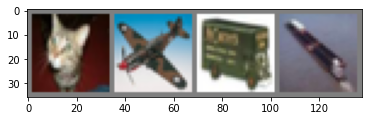

In [21]:
# Good practice to visualize the batches DataLoader serves:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
    
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

****

Training a Model

In [22]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# First, set training and test datasets
transform = transforms.Compose(
    [transforms.ToTensor(), # takes images loaded by Pillow library and converts to pytorch tensors
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # adjusts values of tensor so average is 0 and std_dev is 0.5
    ]
)


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 ship truck   cat  bird


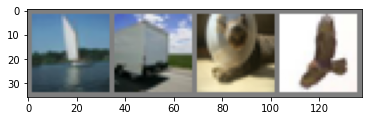

In [24]:
# Next, check output from DataLoader:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
    
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [26]:
# Model to Train:
# Variant of LeNet, adapted for 3-color images

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

net = Net()

In [27]:
# Finally, set loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
# Loss function measures how far from ideal output our model's prediction is
# --- Cross Entropy Loss is a typical loss function for classification of models like this

In [30]:
# Optimizer drives learning.
# ---- This one implements Stochastic Gradient Descent: a straightforward optim algo
# parameters include learning rate (lr) and momentum
# can also pass in net.parameters(), a collection of all learning weights in the model, which is what the optimizer adjusts

In [32]:
# Now, all of this is assembled in the training loop:

for epoch in range(2): # loop over dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): # start iterating at 0
        
        # get the inpiuts
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:   # print every 2000 mini-batches
            print('[%d, %5d], loss: %.3f' % 
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
print('Finished Training')

[1,  2000], loss: 2.187
[1,  4000], loss: 1.851
[1,  6000], loss: 1.659
[1,  8000], loss: 1.594
[1, 10000], loss: 1.520
[1, 12000], loss: 1.488
[2,  2000], loss: 1.408
[2,  4000], loss: 1.374
[2,  6000], loss: 1.365
[2,  8000], loss: 1.311
[2, 10000], loss: 1.297
[2, 12000], loss: 1.284
Finished Training


In [33]:
# here only, doing 2 training epochs (2 passes over the training dataset)
# each pass has inner loop which iterates over the training data, serving batches of transformed input images + correct labels

In [34]:
# Zeroing the gradients means reseting them for every batch, so gradients are correct for each batch of input images

In [35]:
# outputs asks the model to make prediction on this batch
# then criterion is called to calculate loss (difference between outputs and labels (the correct output))
# then backward() pass calculates gradients that will direct learning
# then optimizer performs one learning step, using gradient from backward() to nudge weights to reduce loss

In [37]:
# As a final step, should check that the model is actually doing general learning and not memorizing the dataset
# This is called OVERFITTING, and usually indicates that the dataset is too small, or has more learning parameters than needed

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [ ]:
# This is better than 10% learning which would indicate random results, so some general learning did occur